In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('data/customer_churn_data.csv')

## Initial data integrity checks

In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [9]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [11]:
df["InternetService"] = df["InternetService"].fillna("")

In [12]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

 > Filled NaN values in "InternetService" with "". 

In [15]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [19]:
numeric_columns_data = df.select_dtypes(include= ["number"])
numeric_columns_data.corr()

# Correlation between variables returns a value between -1 and 1. The closer to 1 a variable is from another, the closer they are related, and viceversa.

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


 > We can observe that tenure is closely related to TotalCharges, that's something to have in mind for later. (0.89)

## Data Analysis by groups. Data visualization

In [20]:
df

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [25]:
churn_distr = df["Churn"].value_counts()
print(churn_distr)

Churn
Yes    883
No     117
Name: count, dtype: int64


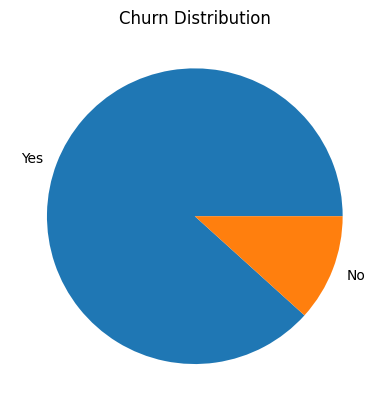

In [24]:
churn_distr.plot(kind="pie")
plt.title("Churn Distribution")
plt.ylabel("")
plt.show()

In [26]:
df.head(2)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.0,Yes,Yes


In [34]:
churn_monthly = df.groupby("Churn")["MonthlyCharges"].mean()
print(churn_monthly)

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64


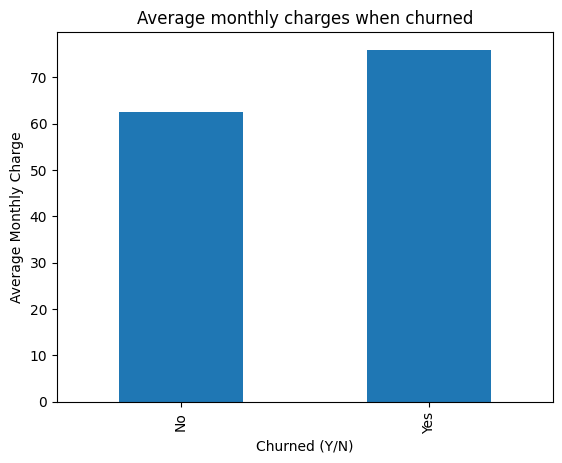

In [36]:
churn_monthly.plot(kind="bar")
plt.title("Average monthly charges when churned")
plt.ylabel("Average Monthly Charge")
plt.xlabel("Churned (Y/N)")
plt.show()

 > At **higher charges**, there's **more churn**.

In [37]:
churn_gender = df.groupby(["Churn", "Gender"])["MonthlyCharges"].mean()
print(churn_gender)

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64


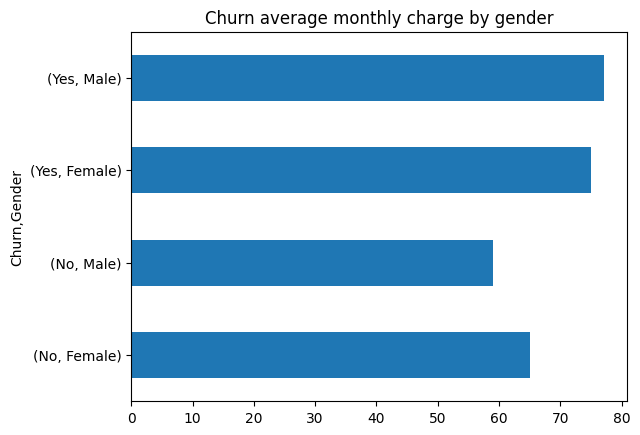

In [49]:
churn_gender.plot(kind="barh")
plt.title("Churn average monthly charge by gender")
plt.show()

 > At higher charges, **Men churn more than women**.

In [50]:
churn_tenure = df.groupby("Churn")["Tenure"].mean()
print(churn_tenure)

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64


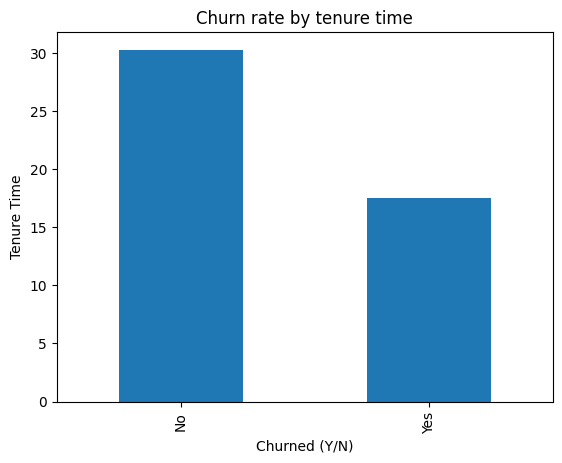

In [57]:
churn_tenure.plot(kind="bar")
plt.title("Churn rate by tenure time")
plt.ylabel("Tenure Time")
plt.xlabel("Churned (Y/N)")
plt.show()

 > At **higher tenure**, there's **less churn**.

In [58]:
churn_age = df.groupby("Churn")["Age"].mean()
print(churn_age)

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64


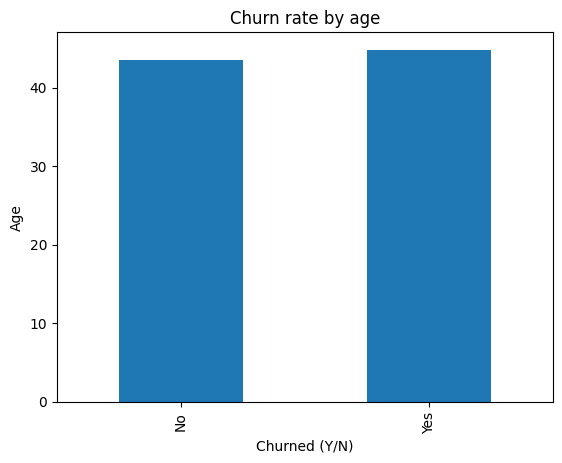

In [59]:
churn_age.plot(kind="bar")
plt.title("Churn rate by age")
plt.ylabel("Age")
plt.xlabel("Churned (Y/N)")
plt.show()

 > Age is **not a defining factor** when it comes to customer's churn trends

In [60]:
churn_contract = df.groupby("ContractType")["MonthlyCharges"].mean()
print(churn_contract)

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64


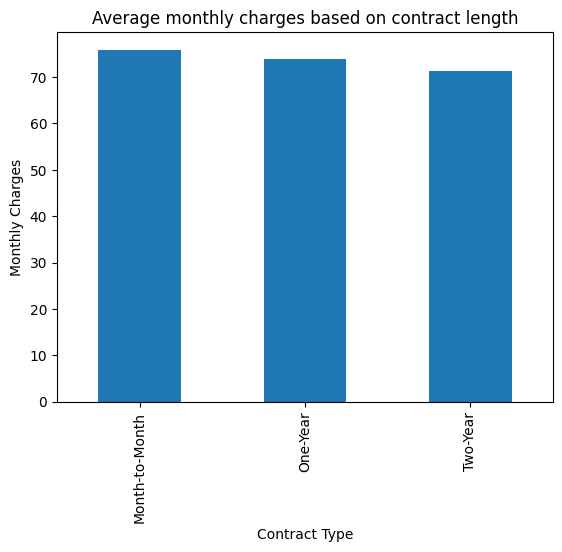

In [63]:
churn_contract.plot(kind="bar")
plt.title("Average monthly charges based on contract length")
plt.ylabel("Monthly Charges")
plt.xlabel("Contract Type")
plt.show()

 > At **shorter contract length**, the charges are **higher**.

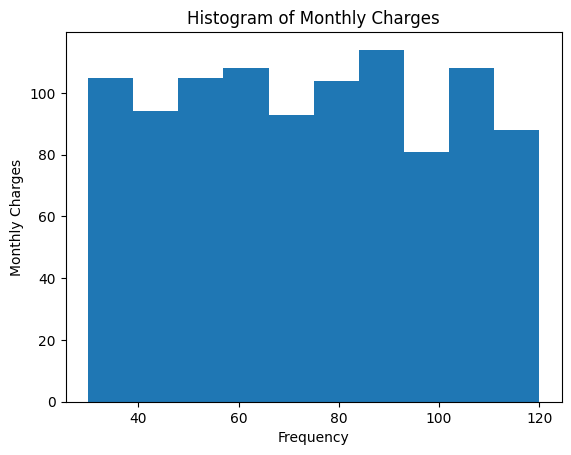

In [66]:
plt.hist(df["MonthlyCharges"])
plt.title("Histogram of Monthly Charges")
plt.ylabel("Monthly Charges")
plt.xlabel("Frequency")
plt.show()

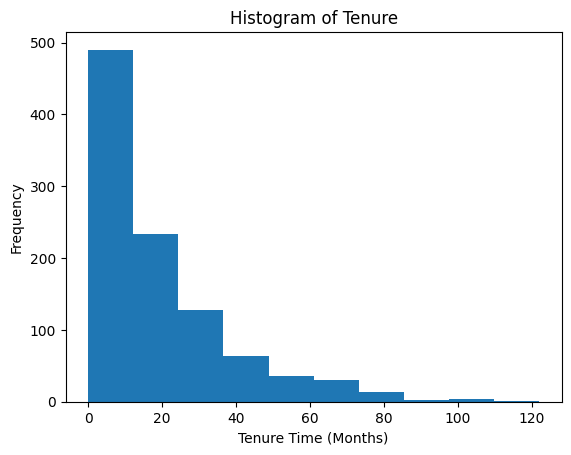

In [67]:
plt.hist(df["Tenure"])
plt.title("Histogram of Tenure")
plt.ylabel("Frequency")
plt.xlabel("Tenure Time (Months)")
plt.show()

## Feature Engineering and Model Training

In [68]:
df.head(1)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.4,Yes,Yes


In [74]:
y = df[["Churn"]]
X = df [["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [ ]:
# We need numeric values for the model
# So in the gender column: 1 - Male ; 0 - Female
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Male" else 0)

In [ ]:
#We need numeric values for the model
#So for the Churn column: 1 - Yes ; 0 - No
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
